In [1]:
import pandas as pd
import numpy as np 
import nltk 
import string 
import re 

In [2]:
#import data abstrak .csv
pd.set_option('display.max_rows', None)
Corpus = pd.read_csv(r"C:\Users\Admin\korpus\JURNAL.csv",encoding='latin-1')
print(Corpus)

     keilmuan                                            abstrak
0           7  Phone cell users countless solve problem damag...
1           5  Dengue Fever (DBD) Malaria kinds diseases extr...
2           3  research discusses simulating application auto...
3           5  Technology development currently human life pr...
4           5  Online school report card information system b...
5           5  increasing demand computers aspects people int...
6           1  Mathematics and Computer Science closely relat...
7           1  research discusses finding solutions Knight's ...
8           4  GNU / Linux operating system users build devel...
9           5  E-Learning accessible web browser. E-Learning ...
10          1  traffic control system computerized. system co...
11          5  Indonesia archipelago country strategic geogra...
12          1  football sport performed humans. development f...
13          5  condition location map. University Lampung cam...
14          1  developmen

In [3]:
def text_lowercase(text): 
    return text.str.lower() 

In [4]:
Corpus['lowercase'] = text_lowercase(Corpus['abstrak'])

In [5]:
Corpus['lowercase'][66]

"in 2013 the research developed a printing utility lecture's attendance using web base of sistem matahari. but due to changes in database and language of siakad (academic system information)  university of lampung in 2014 then the utility cannot be reused. to solving the problem this research had successfully developed a printing utility of lecture's attendance list case study of development of computer science fmipa university of lampung. the making of attendance list is using data source from result from imported excel file format dnk (list of student name in a class) retrieved from siakad university of lampung. the development is also done on improving attendance list printout with the output of a dynamic pdf file that is can be customized to user requirements."

In [6]:
# Remove numbers 
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

In [7]:
Corpus['remove_number'] = Corpus['lowercase'].apply(lambda x: remove_numbers(x))

In [8]:
Corpus['remove_number'][66]

"in  the research developed a printing utility lecture's attendance using web base of sistem matahari. but due to changes in database and language of siakad (academic system information)  university of lampung in  then the utility cannot be reused. to solving the problem this research had successfully developed a printing utility of lecture's attendance list case study of development of computer science fmipa university of lampung. the making of attendance list is using data source from result from imported excel file format dnk (list of student name in a class) retrieved from siakad university of lampung. the development is also done on improving attendance list printout with the output of a dynamic pdf file that is can be customized to user requirements."

In [9]:
# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 

In [10]:
Corpus['remove_whitespace'] = Corpus['remove_number'].apply(lambda x: remove_whitespace(x))

In [11]:
Corpus['remove_whitespace'][66]

"in the research developed a printing utility lecture's attendance using web base of sistem matahari. but due to changes in database and language of siakad (academic system information) university of lampung in then the utility cannot be reused. to solving the problem this research had successfully developed a printing utility of lecture's attendance list case study of development of computer science fmipa university of lampung. the making of attendance list is using data source from result from imported excel file format dnk (list of student name in a class) retrieved from siakad university of lampung. the development is also done on improving attendance list printout with the output of a dynamic pdf file that is can be customized to user requirements."

In [12]:
# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.str.translate(translator) 

In [13]:
Corpus['remove_punctuation'] = remove_punctuation(Corpus['remove_whitespace'])

In [14]:
Corpus['remove_punctuation'][66]

'in the research developed a printing utility lectures attendance using web base of sistem matahari but due to changes in database and language of siakad academic system information university of lampung in then the utility cannot be reused to solving the problem this research had successfully developed a printing utility of lectures attendance list case study of development of computer science fmipa university of lampung the making of attendance list is using data source from result from imported excel file format dnk list of student name in a class retrieved from siakad university of lampung the development is also done on improving attendance list printout with the output of a dynamic pdf file that is can be customized to user requirements'

In [15]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#df['TEXT'].apply(word_tokenize)
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english"))
    stop_words.update(('mobil','a','an','able','about','angkot','alumni','many','pdf',"you've",'often','cause','caused','still','can','could','like','one','us','giska','putri','wulandari','much','sma','negeri','gedong','tataan','since','done','able','pass','called','x','two','via','year','whenever','wherever','want','exist','however','usually','without','three','four','less','art','way','ourself','also','helps','looks','mareover','certain','commonly','enjoyed','arts','nowadays','etc','find','enough','even','seen','known','though','well','others','put','making','created','used','become','became','easier','grow','among','faster','things','dan','therefore','needs','withholding','go','cut','showed','make'))
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

In [16]:
Corpus['stop_words'] = Corpus['remove_punctuation'].apply(lambda x: remove_stopwords(x))

In [17]:
Corpus['abstrak'][20]

' study discusses complexity comparison algorithms Prim Algorithm Kruskal Algorithm Sollin Algorithm. graphs used implementation complete graphs order increment data used generated randomly weight ranging. C++ programming language used develop source code data implementation result found algorithm complexity. '

In [18]:
Corpus['stop_words'][66]

['research',
 'developed',
 'printing',
 'utility',
 'lectures',
 'attendance',
 'using',
 'web',
 'base',
 'sistem',
 'matahari',
 'due',
 'changes',
 'database',
 'language',
 'siakad',
 'academic',
 'system',
 'information',
 'university',
 'lampung',
 'utility',
 'reused',
 'solving',
 'problem',
 'research',
 'successfully',
 'developed',
 'printing',
 'utility',
 'lectures',
 'attendance',
 'list',
 'case',
 'study',
 'development',
 'computer',
 'science',
 'fmipa',
 'university',
 'lampung',
 'attendance',
 'list',
 'using',
 'data',
 'source',
 'result',
 'imported',
 'excel',
 'file',
 'format',
 'dnk',
 'list',
 'student',
 'name',
 'class',
 'retrieved',
 'siakad',
 'university',
 'lampung',
 'development',
 'improving',
 'attendance',
 'list',
 'printout',
 'output',
 'dynamic',
 'file',
 'customized',
 'user',
 'requirements']

In [19]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens if word not in stop_words] 
    new_sentence = ' '.join(lemmas)
    return new_sentence

In [20]:
Corpus['lema'] = Corpus['remove_punctuation'].apply(lambda x: lemmatize_word(x))

In [21]:
Corpus['lema'][1]

'dengue fever dbd malaria kinds diseases extraordinary occurrence indonesia diseases spread rapidly death short time prediction occurrence dengue fever dbd malaria diseases bandar lampung process manually present form table graph research webbased geographic information system webgis develop provide information spread dengue fever dbd malaria diseases city bandar lampung data obtain department health city government webgis implement arcview mapserver mysql database phpmapscript program language result show webgis could provide information spread area dengue fever dbd malaria diseases bandar lampung village level'

In [22]:
Corpus

,keilmuan,abstrak,lowercase,remove_number,remove_whitespace,remove_punctuation,stop_words,lema
0,7,Phone cell users countless solve problem damag...,phone cell users countless solve problem damag...,phone cell users countless solve problem damag...,phone cell users countless solve problem damag...,phone cell users countless solve problem damag...,"[phone, cell, users, countless, solve, problem...",phone cell users countless solve problem damag...
1,5,Dengue Fever (DBD) Malaria kinds diseases extr...,dengue fever (dbd) malaria kinds diseases extr...,dengue fever (dbd) malaria kinds diseases extr...,dengue fever (dbd) malaria kinds diseases extr...,dengue fever dbd malaria kinds diseases extrao...,"[dengue, fever, dbd, malaria, kinds, diseases,...",dengue fever dbd malaria kinds diseases extrao...
2,3,research discusses simulating application auto...,research discusses simulating application auto...,research discusses simulating application auto...,research discusses simulating application auto...,research discusses simulating application auto...,"[research, discusses, simulating, application,...",research discuss simulate application automati...
3,5,Technology development currently human life pr...,technology development currently human life pr...,technology development currently human life pr...,technology development currently human life pr...,technology development currently human life pr...,"[technology, development, currently, human, li...",technology development currently human life pr...
4,5,Online school report card information system b...,online school report card information system b...,online school report card information system b...,online school report card information system b...,online school report card information system b...,"[online, school, report, card, information, sy...",online school report card information system b...
5,5,increasing demand computers aspects people int...,increasing demand computers aspects people int...,increasing demand computers aspects people int...,increasing demand computers aspects people int...,increasing demand computers aspects people int...,"[increasing, demand, computers, aspects, peopl...",increase demand computers aspects people inter...
6,1,Mathematics and Computer Science closely relat...,mathematics and computer science closely relat...,mathematics and computer science closely relat...,mathematics and computer science closely relat...,mathematics and computer science closely relat...,"[mathematics, computer, science, closely, rela...",mathematics computer science closely relate pr...
7,1,research discusses finding solutions Knight's ...,research discusses finding solutions knight's ...,research discusses finding solutions knight's ...,research discusses finding solutions knight's ...,research discusses finding solutions knights t...,"[research, discusses, finding, solutions, knig...",research discuss find solutions knight tour pr...
8,4,GNU / Linux operating system users build devel...,gnu / linux operating system users build devel...,gnu / linux operating system users build devel...,gnu / linux operating system users build devel...,gnu linux operating system users build develo...,"[gnu, linux, operating, system, users, build, ...",gnu linux operate system users build develop o...
9,5,E-Learning accessible web browser. E-Learning ...,e-learning accessible web browser. e-learning ...,e-learning accessible web browser. e-learning ...,e-learning accessible web browser. e-learning ...,elearning accessible web browser elearning ser...,"[elearning, accessible, web, browser, elearnin...",elearning accessible web browser elearning ser...


In [23]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(min_df=1, norm='l2', encoding='latin-1', max_features=200)
#min_df=1, norm='l2', encoding='latin-1',max_features=900
X = tfidf.fit_transform(Corpus['lema'])
Y = Corpus['keilmuan']
print(X.shape)

(144, 200)


In [24]:
print(tfidf.vocabulary_)

{'users': 190, 'problem': 141, 'paper': 130, 'development': 48, 'expert': 58, 'system': 180, 'use': 188, 'methods': 115, 'search': 161, 'get': 72, 'build': 24, 'php': 135, 'program': 144, 'language': 98, 'mysql': 118, 'database': 42, 'access': 2, 'mobile': 116, 'diseases': 51, 'indonesia': 88, 'spread': 172, 'time': 184, 'bandar': 19, 'lampung': 97, 'process': 143, 'present': 139, 'form': 65, 'research': 154, 'webbased': 195, 'information': 89, 'develop': 47, 'provide': 145, 'city': 31, 'data': 41, 'obtain': 124, 'department': 44, 'implement': 83, 'result': 155, 'show': 167, 'application': 14, 'make': 107, 'type': 186, 'apply': 16, 'input': 90, 'give': 74, 'order': 128, 'accordance': 4, 'technology': 182, 'life': 103, 'business': 25, 'education': 54, 'students': 175, 'learn': 99, 'interactive': 92, 'high': 81, 'school': 158, 'base': 20, 'design': 45, 'online': 126, 'report': 152, 'card': 27, 'web': 194, 'service': 166, 'student': 174, 'academic': 1, 'network': 120, 'user': 189, 'method

In [39]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn import model_selection, svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef

scores = []
cross = []
matrix = []
mcc = []
best_svr = svm.SVC(C=10, kernel = 'linear', degree=3, gamma=0.01)
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    cross.append(cross_val_score(best_svr, X, Y, cv=10))
    svc_pred = best_svr.predict(X_test)
    results = confusion_matrix(y_test,svc_pred) 
    matrix.append(accuracy_score(y_test,svc_pred))
    mcc.append(matthews_corrcoef(y_test,svc_pred))
    print(results,"\n")
    print(accuracy_score(y_test,svc_pred),"\n")
    print(classification_report(y_test,svc_pred))
    print(mcc,"\n")
    print("==============================================================================","\n")

Train Index:  [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 0 0 5 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 7 0]
 [0 0 0 1 0]] 

0.4666666666666667 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.47      1.00      0.64         7
           7       0.00      0.00      0.00         1

   micro avg       0.47      0.47      0.47        15
   macro avg       0.09      0.20      0.13        15
weighted avg       0.22      0.47      0.30        15

[0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 1

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 0 4 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 5 0 0 0 0]] 

0.13333333333333333 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.13      1.00      0.24         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5

   micro avg       0.13      0.13      0.13        15
   macro avg       0.02      0.14      0.03        15
weighted avg       0.02      0.13      0.03        15

[0.0, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[1 1 0 0 0 0]
 [0 7 0 0 0 0]
 [0 1 0 0 0 0]
 [0 2 0 0 0 0]
 [0 2 0 0 0 0]
 [0 1 0 0 0 0]] 

0.5333333333333333 

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           5       0.50      1.00      0.67         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

   micro avg       0.53      0.53      0.53        15
   macro avg       0.25      0.25      0.22        15
weighted avg       0.37      0.53      0.40        15

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  74  75  76  77  78  79  80  8

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\si

[[0 3 0 0 0]
 [0 7 0 0 0]
 [0 1 0 0 0]
 [0 2 0 0 0]
 [0 1 0 0 0]] 

0.5 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50        14
   macro avg       0.10      0.20      0.13        14
weighted avg       0.25      0.50      0.33        14

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 10

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 3 0 0 0]
 [0 6 0 0 0]
 [0 1 0 0 0]
 [0 2 0 0 0]
 [0 2 0 0 0]] 

0.42857142857142855 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           5       0.43      1.00      0.60         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2

   micro avg       0.43      0.43      0.43        14
   macro avg       0.09      0.20      0.12        14
weighted avg       0.18      0.43      0.26        14

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 4 0 0]
 [0 0 4 0 0]
 [0 0 4 0 0]] 

0.2857142857142857 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.29      1.00      0.44         4
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4

   micro avg       0.29      0.29      0.29        14
   macro avg       0.06      0.20      0.09        14
weighted avg       0.08      0.29      0.13        14

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0, 0.0, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 3 0 0]
 [0 4 0 0]
 [0 2 0 0]
 [0 5 0 0]] 

0.2857142857142857 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           5       0.29      1.00      0.44         4
           7       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5

   micro avg       0.29      0.29      0.29        14
   macro avg       0.07      0.25      0.11        14
weighted avg       0.08      0.29      0.13        14

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0, 0.0, 0.0, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 10

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[[0 0 2 0 0]
 [0 0 1 0 0]
 [0 0 5 0 0]
 [0 0 1 0 0]
 [0 0 5 0 0]] 

0.35714285714285715 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.36      1.00      0.53         5
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5

   micro avg       0.36      0.36      0.36        14
   macro avg       0.07      0.20      0.11        14
weighted avg       0.13      0.36      0.19        14

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0, 0.0, 0.0, 0.0, 0.0] 


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  8

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
print(scores)

[0.4666666666666667, 0.13333333333333333, 0.6666666666666666, 0.5333333333333333, 0.5, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.35714285714285715, 0.42857142857142855]


In [41]:
print(np.mean(scores))

0.40857142857142853


In [42]:
print(mcc)

[0.0, 0.0, 0.37271714104249454, 0.2969569354582493, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [43]:
print(np.mean(mcc))

0.06696740765007439


In [44]:
print(cross)

[array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4       , 0.4       ,
       0.46153846, 0.46153846, 0.45454545, 0.45454545, 0.45454545]), array([0.28571429, 0.33333333, 0.375     , 0.4 

In [45]:
print(np.mean(cross))

0.4080760905760905


In [46]:
print(np.mean(matrix))

0.40857142857142853


In [33]:
CV_accuracies = cross_val_score(best_svr, X, Y, cv=10)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [34]:
CV_accuracies

array([0.38095238, 0.55555556, 0.625     , 0.46666667, 0.4       ,
       0.61538462, 0.76923077, 0.54545455, 0.81818182, 0.72727273])

In [35]:
CV_accuracies.mean()*100

59.03699078699079

In [36]:
svc_pred = best_svr.predict(X)
print(classification_report(Y,svc_pred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        27
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       0.95      0.98      0.97        57
           6       1.00      1.00      1.00        10
           7       1.00      0.93      0.97        15
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       0.95      0.91      0.93        23
          12       1.00      1.00      1.00         1

   micro avg       0.97      0.97      0.97       144
   macro avg       0.99      0.98      0.98       144
weighted avg       0.97      0.97      0.97       144



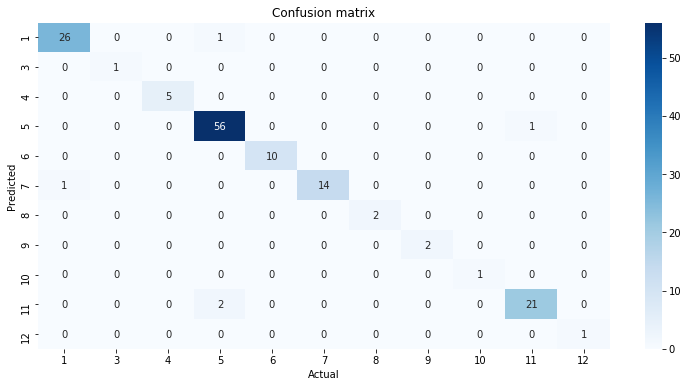

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
aux_df = Corpus[['keilmuan']].drop_duplicates().sort_values('keilmuan')
conf_matrix = confusion_matrix(Y, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['keilmuan'].values, 
            yticklabels=aux_df['keilmuan'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()